<a href="https://colab.research.google.com/github/valerio-unifei/UNIFEI-IA-Aulas/blob/main/UNIFEI_Sele%C3%A7%C3%A3o_de_Modelos_e_M%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

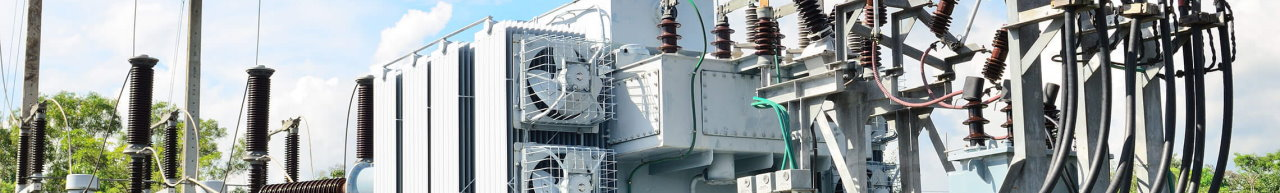

**Dataset de Medições em Transformadores**


In [ ]:
import pandas as pd

# dataset ajustado do link: https://www.kaggle.com/utilityanalytics/oh-transformer-25kva?select=OH+Transformer+25KVA.xlsx
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRD0yFWD-xT6R7ZvbmxlXNybphgppKa-Z7Oy1_CsQDQh6gfKrLFZDUwTA1fnUa90ta07jnUIPLdi9VZ/pub?output=csv'

trafolife = pd.read_csv(url)

trafolife.head()

,infra01,visual01,oil01,load01,infra02,visual02,oil02,load02,infra03,visual03,oil03,load03,infra04,visual04,oil04,load04,infra05,visual05,oil05,load05,infra06,visual06,oil06,load06,Age,Health Index
0,0.00,No Defect,No,20.37,0.00,Minor Defects,No,24.84,0.00,Minor Defects,Minor,32.68,0.01,Minor Defects,Minor,35.91,0.02,Minor Defects,Minor,34.53,0.03,Moderate Defects,Minor,39.69,17,3.2
1,0.03,Moderate Defects,No,7.39,0.05,Moderate Defects,No,9.36,0.08,Moderate Defects,No,10.64,0.12,Moderate Defects,No,10.97,0.20,Significant Defects,No,11.43,0.27,Significant Defects,No,14.85,31,4.9
2,0.10,Moderate Defects,Clear,21.24,0.14,Moderate Defects,Clear,23.34,0.21,Significant Defects,Clear,30.31,0.29,Significant Defects,Clear,31.91,0.41,Significant Defects,Clear,34.31,0.52,Serious Defects,Clear,35.01,38,2.7
3,0.01,Minor Defects,Minor,14.94,0.01,Minor Defects,Minor,15.73,0.03,Moderate Defects,Minor,16.73,0.05,Moderate Defects,Minor,21.45,0.09,Moderate Defects,Minor,23.83,0.13,Moderate Defects,Minor,22.27,25,3.5
4,0.10,Moderate Defects,Major,27.50,0.15,Moderate Defects,Major,28.65,0.21,Significant Defects,Major,30.81,0.31,Significant Defects,Major,29.91,0.40,Significant Defects,Major,33.99,0.57,Significant Defects,Major,33.65,38,1.8


In [ ]:
from sklearn.preprocessing import LabelEncoder

# converte valores discretos em números
labelEncoder = LabelEncoder()

discretos = ('visual01','oil01','visual02','oil02','visual03','oil03',
             'visual04','oil04','visual05','oil05','visual06','oil06')

for dis in discretos:
  labelEncoder.fit(trafolife[dis])
  trafolife[dis]= labelEncoder.transform(trafolife[dis])

# exibindo inicio da tabela convertida
trafolife.head()

,infra01,visual01,oil01,load01,infra02,visual02,oil02,load02,infra03,visual03,oil03,load03,infra04,visual04,oil04,load04,infra05,visual05,oil05,load05,infra06,visual06,oil06,load06,Age,Health Index
0,0.00,2,3,20.37,0.00,0,3,24.84,0.00,0,2,32.68,0.01,0,2,35.91,0.02,0,2,34.53,0.03,1,2,39.69,17,3.2
1,0.03,1,3,7.39,0.05,1,3,9.36,0.08,1,3,10.64,0.12,1,3,10.97,0.20,3,3,11.43,0.27,3,3,14.85,31,4.9
2,0.10,1,0,21.24,0.14,1,0,23.34,0.21,3,0,30.31,0.29,3,0,31.91,0.41,3,0,34.31,0.52,2,0,35.01,38,2.7
3,0.01,0,2,14.94,0.01,0,2,15.73,0.03,1,2,16.73,0.05,1,2,21.45,0.09,1,2,23.83,0.13,1,2,22.27,25,3.5
4,0.10,1,1,27.50,0.15,1,1,28.65,0.21,3,1,30.81,0.31,3,1,29.91,0.40,3,1,33.99,0.57,3,1,33.65,38,1.8


In [ ]:
# distribuição dos valores nas colunas
trafolife.describe()

,infra01,visual01,oil01,load01,infra02,visual02,oil02,load02,infra03,visual03,oil03,load03,infra04,visual04,oil04,load04,infra05,visual05,oil05,load05,infra06,visual06,oil06,load06,Age,Health Index
count,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000
mean,0.070097,1.249365,2.200085,15.736927,0.104446,1.415186,2.174281,17.254664,0.150628,1.522208,2.091371,18.835670,0.210383,1.681472,2.059433,20.626527,0.286662,1.809222,2.025381,22.570385,0.381398,1.924915,1.990059,24.753887,31.463832,2.574556
std,0.076520,1.065548,1.241746,6.888201,0.106260,1.210279,1.248176,7.228161,0.142918,1.271289,1.282131,7.565785,0.186101,1.179859,1.285079,7.925219,0.238123,1.033797,1.286449,8.320618,0.296829,0.838610,1.286085,8.746485,9.196717,1.398344
min,0.000000,0.000000,0.000000,3.280000,0.000000,0.000000,0.000000,3.990000,0.000000,0.000000,0.000000,5.110000,0.000000,0.000000,0.000000,5.930000,0.010000,0.000000,0.000000,7.490000,0.020000,0.000000,0.000000,10.000000,15.000000,0.100000
25%,0.000000,0.000000,1.000000,10.220000,0.010000,0.000000,1.000000,11.315000,0.020000,0.000000,1.000000,12.560000,0.040000,1.000000,1.000000,13.970000,0.060000,1.000000,1.000000,15.300000,0.100000,1.000000,1.000000,17.105000,23.000000,1.400000
50%,0.040000,1.000000,3.000000,14.790000,0.060000,1.000000,3.000000,16.550000,0.100000,1.000000,2.000000,18.200000,0.150000,2.000000,2.000000,20.125000,0.220000,2.000000,2.000000,22.430000,0.310000,2.000000,2.000000,24.750000,32.000000,2.600000
75%,0.130000,2.000000,3.000000,20.330000,0.190000,3.000000,3.000000,22.182500,0.270000,3.000000,3.000000,24.292500,0.360000,3.000000,3.000000,26.580000,0.480000,3.000000,3.000000,29.230000,0.630000,3.000000,3.000000,32.340000,40.000000,3.800000
max,0.250000,3.000000,4.000000,39.910000,0.350000,3.000000,4.000000,39.860000,0.470000,3.000000,4.000000,39.830000,0.620000,3.000000,4.000000,39.990000,0.800000,3.000000,4.000000,39.960000,1.000000,3.000000,4.000000,40.000000,45.000000,5.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

# tutor - convertido para categorias igualmente espaçadas
labels=["ruim", "razoavel", "bom"]

y = pd.cut(trafolife['Health Index'].values,
           len(labels), labels=labels).codes

print('Tutor:',y, 'Size:', len(y))

# casos
X = trafolife.drop('Health Index',axis=1).values

# normalizar os casos dataset
X = StandardScaler().fit_transform(X)
print('Valores normalizados por coluna')

Tutor: [1 2 1 ... 2 2 0] Size: 4728
Valores normalizados por coluna


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

nomes = [
  "Nearest Neighbors", 
  "Linear SVM", 
  "RBF SVM",
  "Decision Tree", 
  "Random Forest", 
  "Neural Net", 
  "AdaBoost",
  "Naive Bayes", 
  "QDA",
  ]

classificadores = [
  # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
  KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto'),
  # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
  SVC(C=0.025, kernel="linear", degree=3, gamma='scale'),
  SVC(C=1.0, kernel="rbf", degree=3, gamma=2),
  # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_split=2),
  # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  RandomForestClassifier(n_estimators=10, max_depth=5, max_features=1),
  # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                alpha=1, batch_size='auto', learning_rate='constant', 
                learning_rate_init=0.001, max_iter=1000),
  # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
  AdaBoostClassifier(n_estimators=50, learning_rate=1.0),
  # https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
  GaussianNB(var_smoothing=1e-9),
  # https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html
  QuadraticDiscriminantAnalysis(reg_param=0.0, store_covariance=False),
  ]

len(nomes)

9

In [ ]:
from sklearn.model_selection import KFold
from statistics import mean 
from sklearn.metrics import classification_report

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
kf = KFold(n_splits=10) # 10-Fold
kf.get_n_splits(X)

for nome, clf in zip(nomes, classificadores):
  y_real = []
  y_prev = []
  for train_index, test_index in kf.split(X):
    # dataset de treinamento(X_train,y_train)
    # dataset de testes(X_test,y_test)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    
    y_real.extend(y_test)
    y_prev.extend(y_pred)
  
  print('========',nome,'=============')
  #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
  print(classification_report(y_real, y_prev, target_names=labels))
  print()

======== Nearest Neighbors =============
              precision    recall  f1-score   support

        ruim       0.83      0.81      0.82      1529
    razoavel       0.75      0.67      0.71      1624
         bom       0.80      0.91      0.85      1575

    accuracy                           0.79      4728
   macro avg       0.79      0.80      0.79      4728
weighted avg       0.79      0.79      0.79      4728


======== Linear SVM =============
              precision    recall  f1-score   support

        ruim       0.52      0.59      0.55      1529
    razoavel       0.61      0.34      0.44      1624
         bom       0.62      0.82      0.71      1575

    accuracy                           0.58      4728
   macro avg       0.58      0.58      0.57      4728
weighted avg       0.58      0.58      0.56      4728


======== RBF SVM =============
              precision    recall  f1-score   support

        ruim       0.88      0.59      0.71      1529
    razoavel       0.